In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
# Checking for Missing Values->
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

EDA->

<Axes: ylabel='target'>

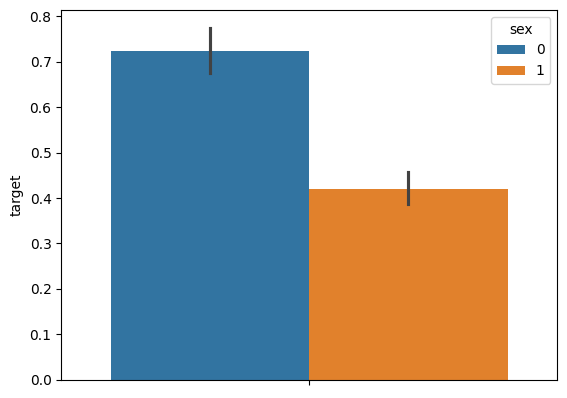

In [6]:
# Performing Some EDA->
sns.barplot(y=df['target'],hue=df['sex'])

In [34]:
len(df['target']==1)

1025

In [40]:
# Calculating the percentage patients
male_patients = len(df[(df['target'] == 1) & (df['sex'] == 1)])
total_patients_with_target_1 = len(df[df['target'] == 1])

percentage_male_patients = (male_patients / total_patients_with_target_1) * 100
print(f'Male Patients: {percentage_male_patients:.2f} %')


male_patients = len(df[(df['target'] == 1) & (df['sex'] == 0)])
percentage_female_patients = (male_patients / total_patients_with_target_1) * 100
print(f'Female Patients: {percentage_female_patients:.2f} %')


Male Patients: 57.03 %
Female Patients: 42.97 %


Males are more prone to heart disease

Heart disease frequency for ages


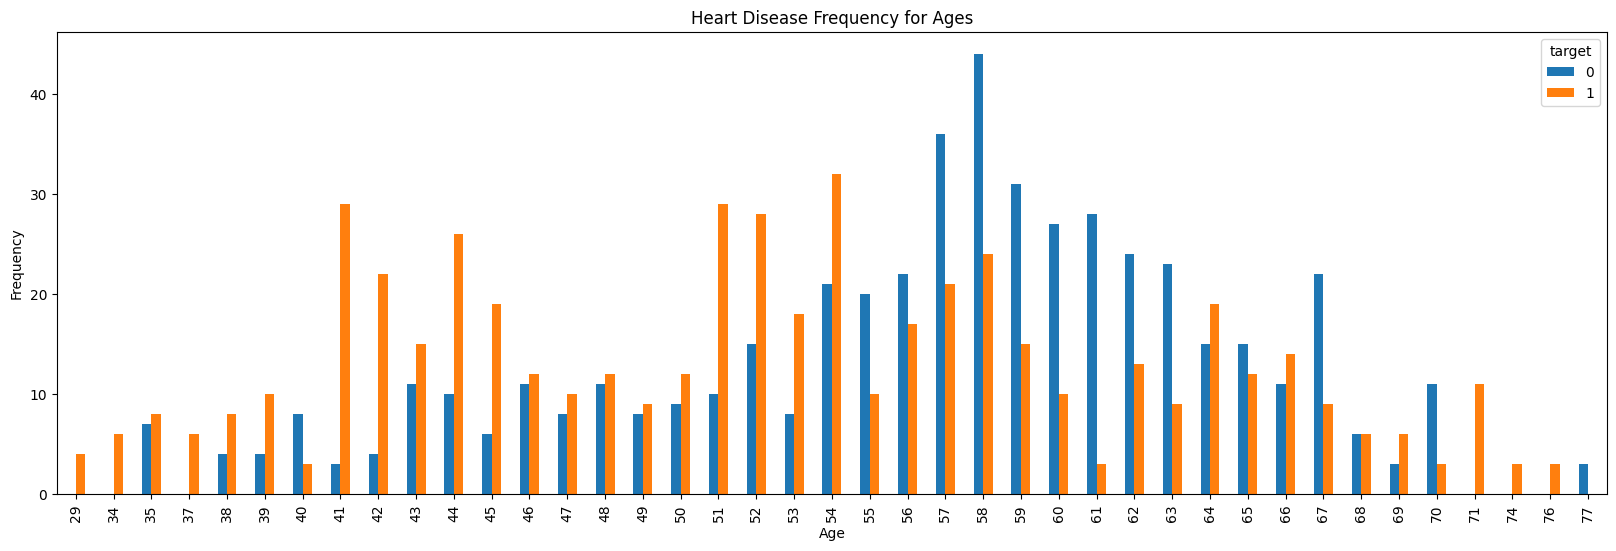

In [7]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [10]:
# Renaming Data columns->
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Fasting Blood sugar Data


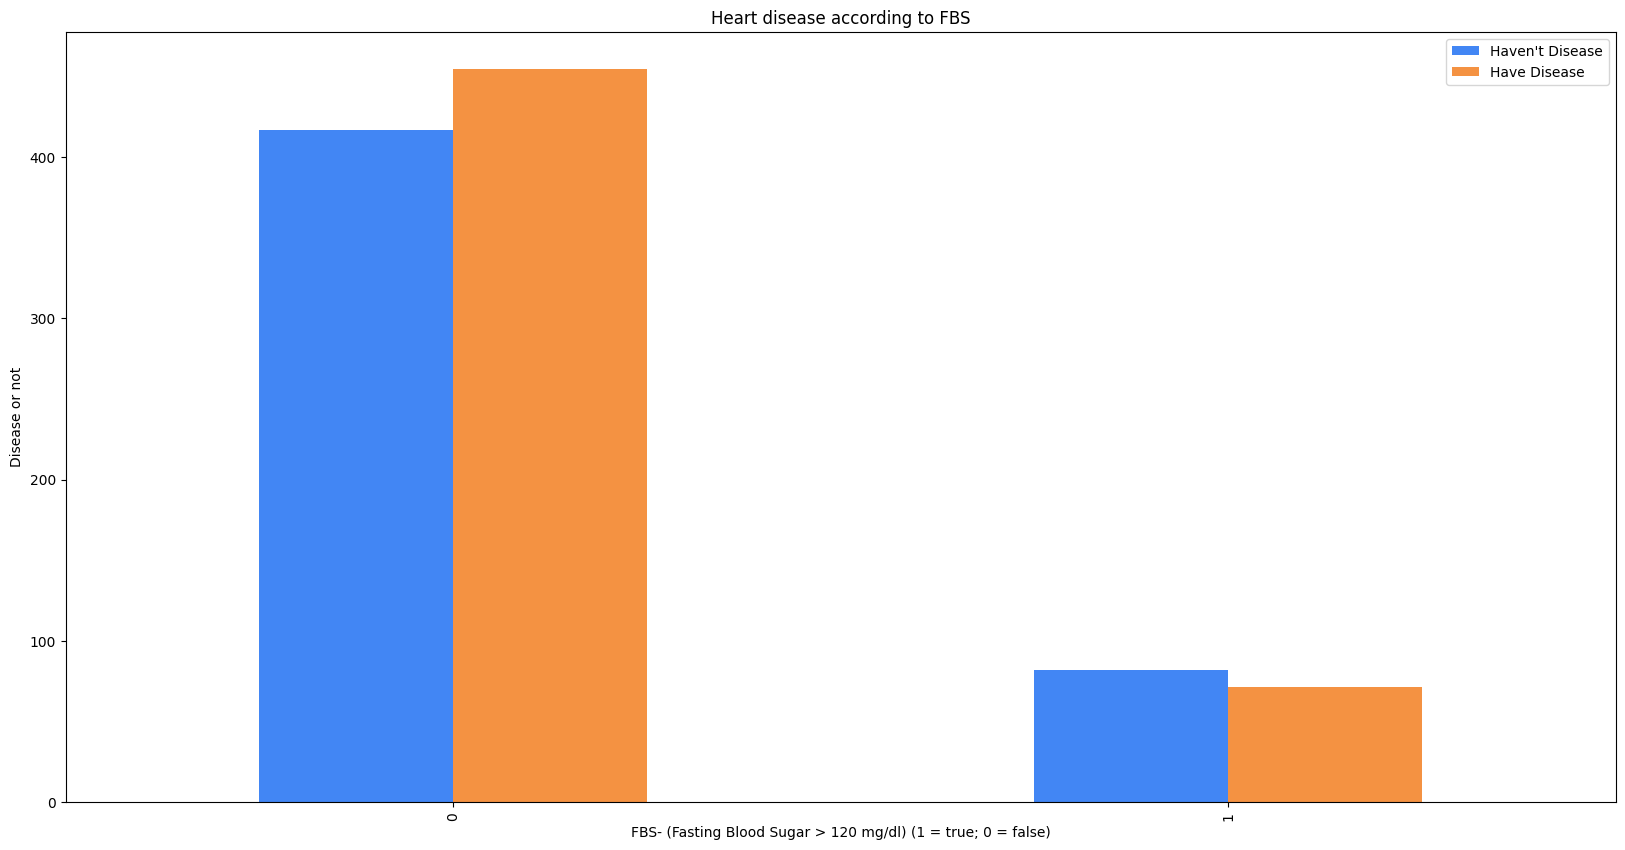

In [11]:
pd.crosstab(df.fasting_blood_sugar,df.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [46]:
names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

In [49]:
df[names]

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,52,125,212,168,1.0,2
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,1
4,62,138,294,106,1.9,3
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0
1021,60,125,258,141,2.8,1
1022,47,110,275,118,1.0,1
1023,50,110,254,159,0.0,0


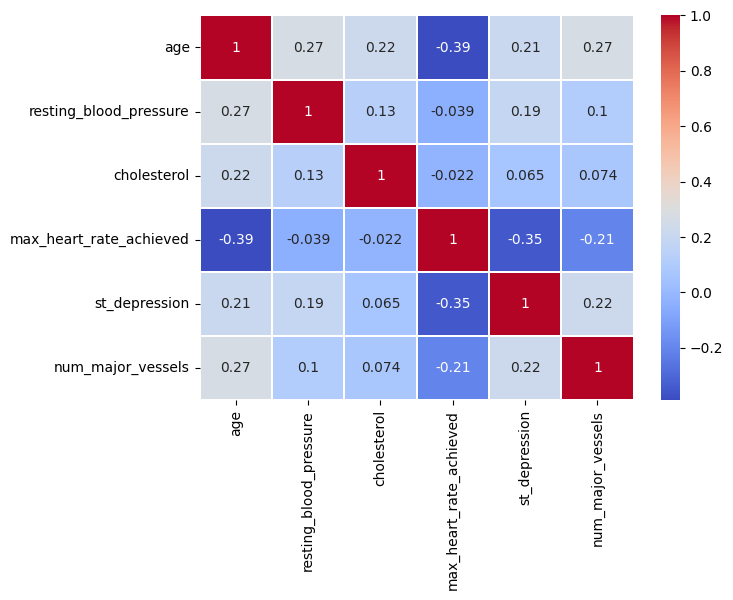

In [51]:

#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = df.loc[:,names]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [53]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
# So, there is no Outliers in this data

In [56]:
# Checking the diatribution of the data->
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [57]:
# So the distribution is almost Normal

Model->

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [63]:
# Separating categorical and numerical columns to scale the numerical cols.
num_col=[]
for col in df.columns:
    if df[col].nunique()>=10:
        num_col.append(col)

In [64]:
num_col

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression']

In [67]:
df[num_col][:2]

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,52,125,212,168,1.0
1,53,140,203,155,3.1


In [68]:
# applying standard scaler->
scaler=StandardScaler()
df[num_col]=scaler.fit_transform(df[num_col])

In [69]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [76]:
# Doing train test split
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=0.3,random_state=42)

In [77]:
from sklearn.metrics import classification_report, accuracy_score


In [78]:
# Using grid search cv->
param_grid_lr = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize classifiers
classifiers = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Decision Tree': (DecisionTreeClassifier(), param_grid_dt),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Naive Bayes': (GaussianNB(), param_grid_nb),
    'Support Vector Machine': (SVC(), param_grid_svc),
    'K-Nearest Neighbors': (KNeighborsClassifier(), param_grid_knn)
}

# Perform Grid Search with Cross-Validation and store the accuracy scores
best_models = {}
accuracy_scores = {}

for name, (model, param_grid) in classifiers.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}\n")

Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
Accuracy for Logistic Regression: 0.8052
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy for Decision Tree: 0.9708
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97  

In [79]:
# Print all accuracy scores
print("Summary of accuracy scores:")
for name, accuracy in accuracy_scores.items():
    print(f"{name}: {accuracy*100:.4f}")

Summary of accuracy scores:
Logistic Regression: 80.5195
Decision Tree: 97.0779
Random Forest: 98.0519
Naive Bayes: 81.4935
Support Vector Machine: 97.0779
K-Nearest Neighbors: 100.0000


In [80]:
best_models['K-Nearest Neighbors']

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [81]:
from sklearn.metrics import confusion_matrix

In [85]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

Text(95.72222222222221, 0.5, 'Actual Value')

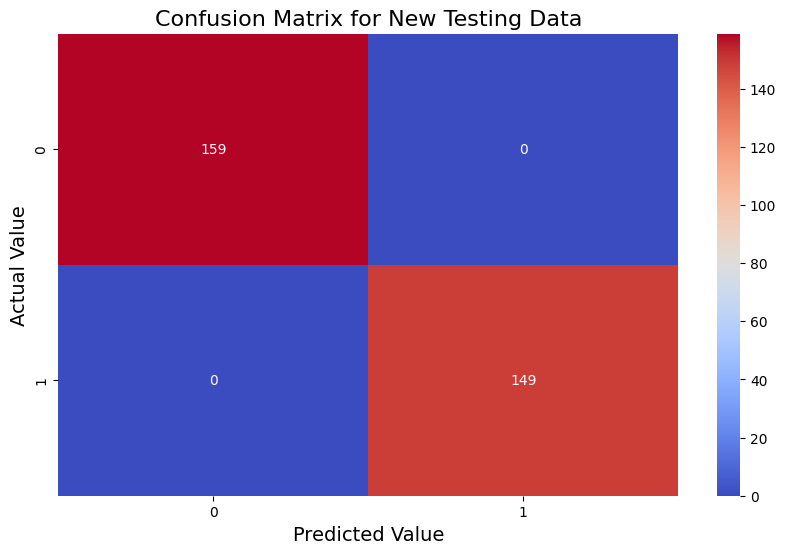

In [86]:
y_pred_knn=knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)


The KNN is giving 100% accuracy

In [87]:
# Checking if dropping any duplicates makes any difference->
df2=pd.read_csv("heart.csv")

In [89]:
df2.duplicated().any()

True

In [90]:
df2=df2.drop_duplicates()

In [91]:
df2.duplicated().any()

False

In [92]:
df2.shape

(302, 14)

In [95]:
df2.columns= ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [97]:
num_col2=[]
for col in df.columns:
    if df[col].nunique()>=10:
        num_col2.append(col)

In [98]:
scaler2=StandardScaler()
df2[num_col2]=scaler2.fit_transform(df2[num_col2])

In [99]:
df2.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [100]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=0.3,random_state=42)

In [101]:
# Using grid search cv->
param_grid_lr = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize classifiers
classifiers = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Decision Tree': (DecisionTreeClassifier(), param_grid_dt),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Naive Bayes': (GaussianNB(), param_grid_nb),
    'Support Vector Machine': (SVC(), param_grid_svc),
    'K-Nearest Neighbors': (KNeighborsClassifier(), param_grid_knn)
}

# Perform Grid Search with Cross-Validation and store the accuracy scores
best_models2 = {}
accuracy_scores2 = {}

for name, (model, param_grid) in classifiers.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models2[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores2[name] = accuracy
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}\n")

Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
Accuracy for Logistic Regression: 0.8052
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy for Decision Tree: 0.9708
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97  

In [102]:
print("Summary of accuracy scores:")
for name, accuracy in accuracy_scores2.items():
    print(f"{name}: {accuracy*100:.4f}")

Summary of accuracy scores:
Logistic Regression: 80.5195
Decision Tree: 97.0779
Random Forest: 98.0519
Naive Bayes: 81.4935
Support Vector Machine: 97.0779
K-Nearest Neighbors: 100.0000


In [105]:
best_models2['K-Nearest Neighbors']

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [104]:
knn2=KNeighborsClassifier()
knn2.fit(X_train,y_train)
y_pred=knn2.predict(X_test)
accuracy_score(y_test,y_pred)

0.8181818181818182

**Conclusion->**

Therefore we can see that KNN with best parameters is giving 100% accuracy irrespective of any duplicate data. Whereas if we use it with default values , it is giving 81% accuracy. 
Therefore using the model with best parameters as the final model.

In [106]:
knn_final=KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
knn_final.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [109]:
import joblib

In [111]:
# Saving the final model
joblib_file = "knn_model.pkl"
joblib.dump(knn_final, joblib_file)

['knn_model.pkl']

In [129]:
# Storing the Scaler
joblib_file = "scaler.pkl"
joblib.dump(scaler2, joblib_file)

['scaler.pkl']

In [130]:
sc=joblib.load("scaler.pkl")

In [170]:
df2.iloc[0].values.reshape(1,-1)

array([[-0.26796589,  1.        ,  0.        , -0.37655636, -0.66772815,
         0.        ,  1.        ,  0.80603539,  0.        , -0.03712404,
         2.        ,  2.        ,  3.        ,  0.        ]])

In [157]:
knn_final.predict(df2[0].values)

KeyError: 0